## Using features extracted from intensity profiles


In [ ]:
!pip install adjustText

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS, AffinityPropagation
from seaborn import scatterplot
from scipy.signal import savgol_filter
from adjustText import adjust_text

In [ ]:
import matplotlib.pylab as pylab
params = {
    'font.size': 12,
    'legend.fontsize':'large',
    'figure.titlesize':'large',
    'axes.grid':False,
    'axes.labelsize':'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    #'figure.figsize': (5, 6)
    }
pylab.rcParams.update(params)

In [ ]:
def plot_helper(df, x_axis='', y_axis=''):
    adjust_location = 0.1
    fig, ax = plt.subplots(figsize=(6, 6))
    annot = []
    xs = []
    ys = []
    texts = []
    unique_clusters = df['Cluster'].unique()
    num_clusters = len(unique_clusters)
    color_palette = sns.color_palette('magma', num_clusters)
    ax = sns.scatterplot(x=x_axis, y=y_axis, data=df, style='Plaque', s=75, ec=None, hue='Cluster', palette=color_palette)

    for round_one_cell in round_one_cells:
        xs.append(df[x_axis].loc[round_one_cell])
        ys.append(df[y_axis].loc[round_one_cell])
        annot.append(f'P{round_one_cells.index(round_one_cell) + 1}C1')
        ax.scatter(df[x_axis].loc[round_one_cell], df[y_axis].loc[round_one_cell], s=150, facecolors='none',
                    edgecolors='k')
        # ax.annotate(f'P{round_one_cells.index(round_one_cell) + 1}C1',
        #             (df[x_axis].loc[round_one_cell], df[y_axis].loc[round_one_cell] - adjust_location),
        #             ha='center', va='top', size='medium')
    for x, y, s in zip(xs, ys, annot):
        texts.append(plt.text(x, y, s))
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, expand=(1.2, 2), arrowprops=dict(arrowstyle="->", color='k', lw=1.))
    plt.legend(loc='upper center', labelspacing=0.1, bbox_to_anchor=(0.5, -0.1), ncol=4, fancybox=False, shadow=False)
    plt.show()
    return

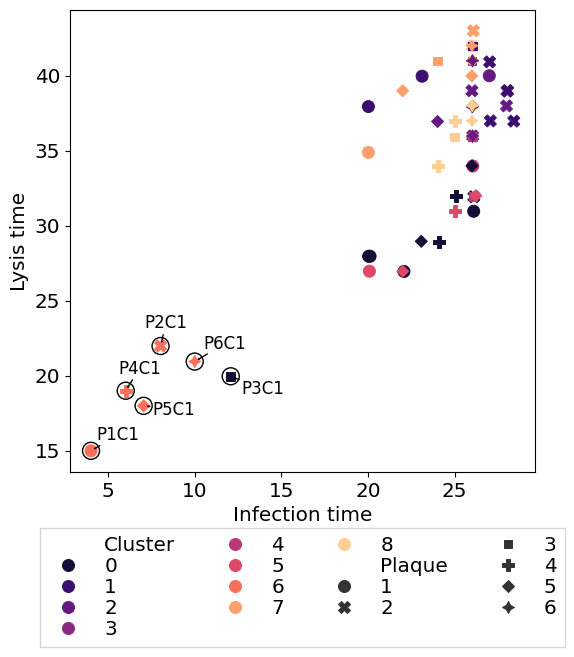

Cluster
0    10
1     9
7     9
2     7
8     6
6     5
4     5
5     4
3     1
Name: count, dtype: int64


In [ ]:
# file_name = 'experimental data - attributes.xlsx'
# sheet_name = 'all plaques'
# n_rows = 153
# round_one_cells = [0, 20, 34, 49, 73, 86, 94, 117]
# plaque_markers_dict = {1: '*',2: 'o',3: '<',4: 'D',5: 'X',6: 's',7: '^',8: 'p'}

# file_name = 'S1.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# round_one_cells = [0, 10, 20, 30] # similar toy data
# plaque_markers_dict = {1: '*',2: 'o',3: '<',4: 'D'}

# file_name = 'S2.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# round_one_cells = [0, 10, 20, 30] # similar toy data
# plaque_markers_dict = {1: '*',2: 'o',3: '<',4: 'D'}

file_name = 'S3.xlsx'
sheet_name = 'attributes'
n_rows = 56
round_one_cells = [0, 11, 24, 31, 37, 47] # dissimilar toy data
plaque_markers_dict = {1: '*',2: 'o',3: '<',4: 'D',5: 'X',6: 's'}

attributes_df = pd.read_excel(file_name, sheet_name, nrows=n_rows)
attributes_df = attributes_df.drop(labels=['Unnamed: 0', 'Cell #', 'Plaque', 'Cell ID'], axis=1)

scaled_data = StandardScaler().fit_transform(attributes_df)

# clustering = HDBSCAN(min_cluster_size=3).fit(scaled_data)
# clustering = OPTICS(min_samples=9).fit(scaled_data)
clustering = AffinityPropagation(damping=0.7).fit(scaled_data)

out_df = pd.read_excel(file_name, sheet_name, nrows=n_rows)
out_df = out_df.drop(labels=['Unnamed: 0'], axis=1)
out_df['Cluster'] = clustering.labels_
out_df['Plaque marker'] = out_df['Plaque'].map(plaque_markers_dict)

plot_helper(out_df, x_axis='Infection time', y_axis='Lysis time')
print(out_df['Cluster'].value_counts())